In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#import splitfolders
import os
import cv2
import numpy as np
import random

In [ ]:
labels = ['High','Low']
img_size = 128
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
    

In [ ]:
!unzip '/content/drive/MyDrive/Training/covid infection percent 499/final test/data.zip'

Archive:  /content/drive/MyDrive/Training/covid infection percent 499/final test/data.zip
   creating: data/High/
  inflating: data/High/Image_0000.png  
  inflating: data/High/Image_0001.png  
  inflating: data/High/Image_0002.png  
  inflating: data/High/Image_0003.png  
  inflating: data/High/Image_0004.png  
  inflating: data/High/Image_0005.png  
  inflating: data/High/Image_0006.png  
  inflating: data/High/Image_0007.png  
  inflating: data/High/Image_0008.png  
  inflating: data/High/Image_0009.png  
  inflating: data/High/Image_0010.png  
  inflating: data/High/Image_0011.png  
  inflating: data/High/Image_0012.png  
  inflating: data/High/Image_0013.png  
  inflating: data/High/Image_0014.png  
  inflating: data/High/Image_0015.png  
  inflating: data/High/Image_0016.png  
  inflating: data/High/Image_0017.png  
  inflating: data/High/Image_0018.png  
  inflating: data/High/Image_0019.png  
  inflating: data/High/Image_0020.png  
  inflating: data/High/Image_0021.png  
  infl

In [ ]:
import os

In [ ]:
len(os.listdir('/content/data/High')), \
len(os.listdir('/content/data/Low'))


(1504, 1569)

In [ ]:
!pip install split-folders

In [ ]:
#new folder for dataset
import os
os.makedirs('/content/drive/MyDrive/Training/covid infection percent 499/final test/Dataset')
!cp -r '/content/data/High' -d '/content/drive/MyDrive/Training/covid infection percent 499/final test/Dataset'
!cp -r '/content/data/Low' -d '/content/drive/MyDrive/Training/covid infection percent 499/final test/Dataset'

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Training/covid infection percent 499/final test/Dataset', output="splitted_data", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 3073 files [00:18, 169.18 files/s]


In [ ]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/Training/covid infection percent 499/final test'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/test/ (stored 0%)
  adding: content/splitted_data/test/Low/ (stored 0%)
  adding: content/splitted_data/test/Low/Image_2311.png (deflated 3%)
  adding: content/splitted_data/test/Low/Image_1811.png (deflated 2%)
  adding: content/splitted_data/test/Low/Image_2824.png (deflated 4%)
  adding: content/splitted_data/test/Low/Image_1843.png (deflated 2%)
  adding: content/splitted_data/test/Low/Image_2365.png (deflated 2%)
  adding: content/splitted_data/test/Low/Image_2421.png (deflated 3%)
  adding: content/splitted_data/test/Low/Image_2563.png (deflated 4%)
  adding: content/splitted_data/test/Low/Image_2844.png (deflated 2%)
  adding: content/splitted_data/test/Low/Image_3043.png (deflated 2%)
  adding: content/splitted_data/test/Low/Image_2234.png (deflated 3%)
  adding: content/splitted_data/test/Low/Image_2199(1).png (deflated 4%)
  adding: content/splitted_data/test/Low/Image_2822.png (deflated 4%)
  adding

In [ ]:
!cp '/content/drive/MyDrive/Training/covid infection percent 499/final test/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/test/
   creating: content/splitted_data/test/Low/
  inflating: content/splitted_data/test/Low/Image_2311.png  
  inflating: content/splitted_data/test/Low/Image_1811.png  
  inflating: content/splitted_data/test/Low/Image_2824.png  
  inflating: content/splitted_data/test/Low/Image_1843.png  
  inflating: content/splitted_data/test/Low/Image_2365.png  
  inflating: content/splitted_data/test/Low/Image_2421.png  
  inflating: content/splitted_data/test/Low/Image_2563.png  
  inflating: content/splitted_data/test/Low/Image_2844.png  
  inflating: content/splitted_data/test/Low/Image_3043.png  
  inflating: content/splitted_data/test/Low/Image_2234.png  
  inflating: content/splitted_data/test/Low/Image_2199(1).png  
  inflating: content/splitted_data/test/Low/Image_2822.png  
  inflating: content/splitted_data/test/Low/Image_2617.png  
  inflating: content/splitted_data/test/Low/I

In [ ]:
!pip install scikit-plot

In [ ]:
train = get_data('/content/splitted_data/train')
val = get_data('/content/splitted_data/val')
#test = get_data('/content/drive/MyDrive/Colab Notebooks/3_fold_splited_Brain_Tumor_test_train_val/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


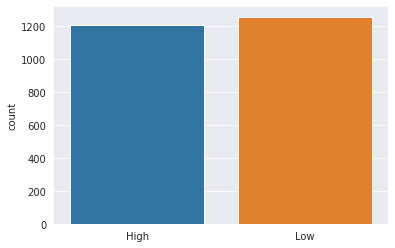

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
      l.append("High")
    else:
        l.append("Low")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'High')

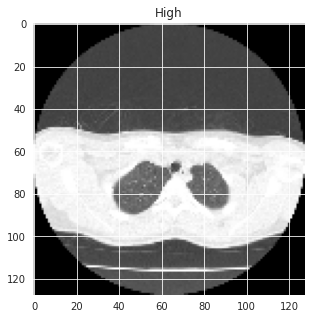

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Low')

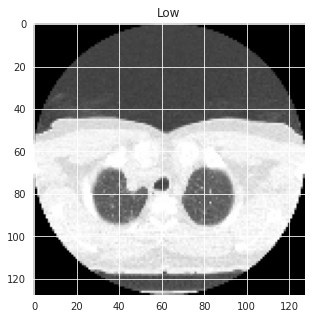

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255


x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
x_train.shape

(2458, 128, 128, 3)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,
        fill_mode='nearest',  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
def get_model():

  model = Sequential()
  model.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(128,128,3)))
  model.add(MaxPool2D())

  model.add(Conv2D(64, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  #model.add(Conv2D(64, 3, padding="same", activation="relu"))
  #model.add(BatchNormalization())
  #model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D())

  model.add(Conv2D(128, 3, padding="same", activation="relu"))
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(2, activation="softmax"))

  return model

model=get_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       7

In [ ]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 200,batch_size=32 , validation_data = (x_val, y_val))

Epoch 1/200
77/77 [==============================] - 17s 78ms/step - loss: 0.7591 - accuracy: 0.5085 - val_loss: 0.6910 - val_accuracy: 0.5196
Epoch 2/200
77/77 [==============================] - 5s 59ms/step - loss: 0.6962 - accuracy: 0.5391 - val_loss: 0.6891 - val_accuracy: 0.5425
Epoch 3/200
77/77 [==============================] - 5s 61ms/step - loss: 0.6927 - accuracy: 0.5590 - val_loss: 0.6859 - val_accuracy: 0.5556
Epoch 4/200
77/77 [==============================] - 5s 62ms/step - loss: 0.6816 - accuracy: 0.5456 - val_loss: 0.6828 - val_accuracy: 0.5654
Epoch 5/200
77/77 [==============================] - 5s 58ms/step - loss: 0.6715 - accuracy: 0.5753 - val_loss: 0.6796 - val_accuracy: 0.5817
Epoch 6/200
77/77 [==============================] - 5s 59ms/step - loss: 0.6748 - accuracy: 0.5614 - val_loss: 0.6771 - val_accuracy: 0.5850
Epoch 7/200
77/77 [==============================] - 5s 59ms/step - loss: 0.6634 - accuracy: 0.5850 - val_loss: 0.6762 - val_accuracy: 0.5686
Epoch

In [ ]:
scores = model.evaluate(x_val,y_val , verbose=0)

In [ ]:
accuracy= scores[1]*100
loss=scores[0]
print('Accuracy: ', accuracy)
print('Loss: ',  loss)

Accuracy:  99.34640526771545
Loss:  0.030045466497540474


In [ ]:
model.save('model.h5')

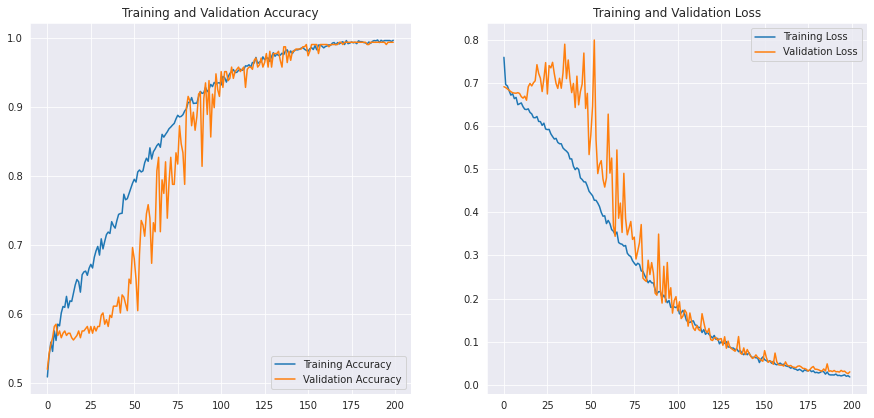

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

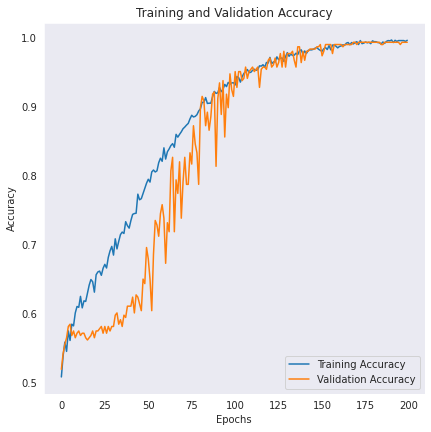

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(False)
plt.title('Training and Validation Accuracy')

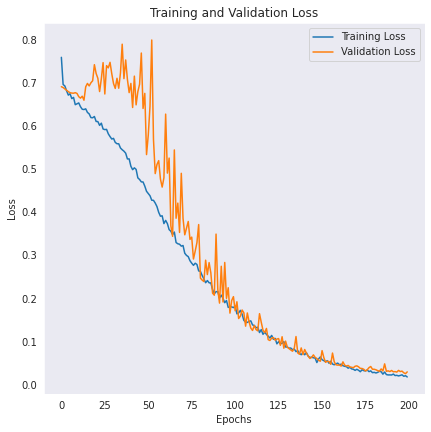

In [ ]:
epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

In [ ]:
model=tf.keras.models.load_model('model.h5')

In [ ]:
prediction=model.predict([x_val])

In [ ]:
print(np.argmax(prediction[4]))

0


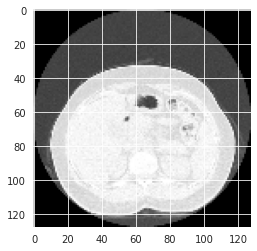

In [ ]:
plt.imshow(x_val[4])
plt.show()

In [ ]:
model=tf.keras.models.load_model('model.h5')

In [ ]:
prediction=model.predict([x_val])

In [ ]:
print(np.argmax(prediction[4]))

0


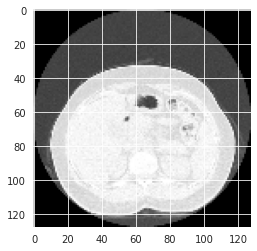

In [ ]:
plt.imshow(x_val[4])
plt.show()

In [ ]:
test_data_dir= '/content/splitted_data/test'
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir
                                                           , target_size=(128, 128)
                                                           , batch_size=5
                                                           , classes=labels
                                                           , seed=0
                                                           , shuffle=False)

Found 309 images belonging to 2 classes.


In [ ]:
train_data_dir='/content/splitted_data/train'
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir
                                                           , target_size=(128, 128)
                                                           , batch_size=10
                                                           , classes=labels
                                                           , seed=0
                                                           , shuffle=True)

Found 2458 images belonging to 2 classes.


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_generator)

In [ ]:
predictions[39]

array([0.73105854, 0.26894143], dtype=float32)

In [ ]:
np.argmax(predictions[39])

0

[197, 215, 20, 132, 261, 248, 207, 155, 244, 183]


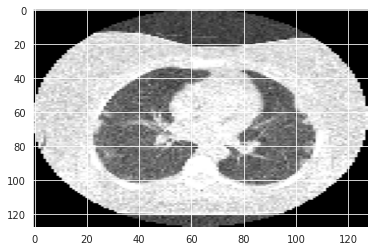

predicted: $Low Correctly Classified


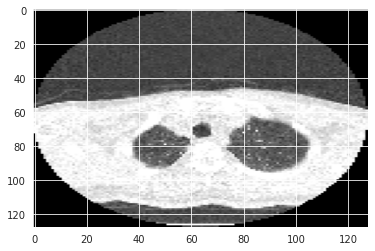

predicted: $High Mis-classified


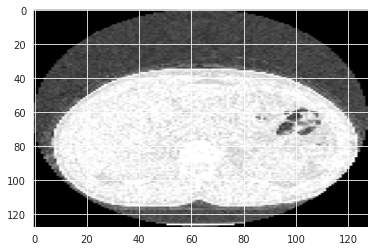

predicted: $High Correctly Classified


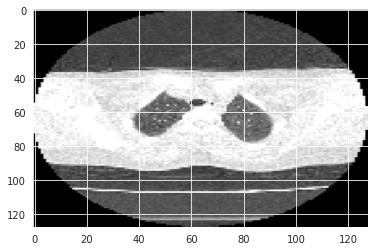

predicted: $High Correctly Classified


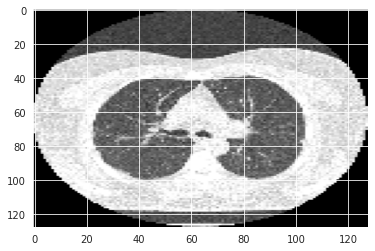

predicted: $Low Correctly Classified


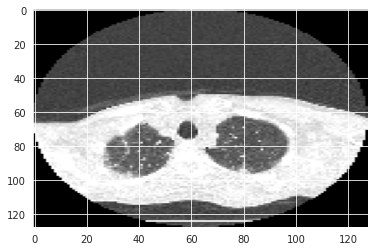

predicted: $High Mis-classified


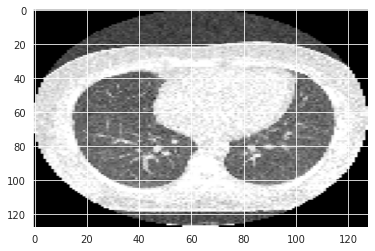

predicted: $Low Correctly Classified


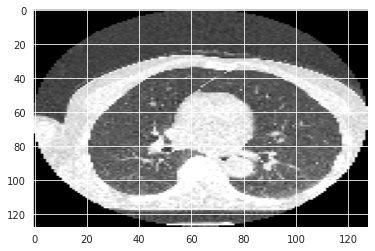

predicted: $Low Correctly Classified


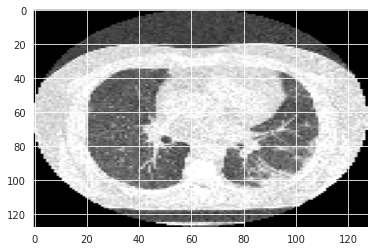

predicted: $Low Correctly Classified


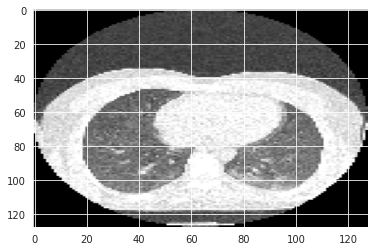

predicted: $Low Correctly Classified


In [ ]:
# Plot five random images and their predictions
random.seed(0)
numbers = [random.randint(0, 309) for i in range(0, 10)]
print(numbers)
actual = test_generator.classes 

predict = np.argmax(model.predict(test_generator),axis =1)


for num in numbers:
   
    for key, value in train_generator.class_indices.items():
        if value == predict[num]:
            key_value = key
    
    plt.imshow(test_generator[num // 5][0][num % 5].astype(np.uint8), aspect='auto')
    plt.show()
    
    if predict[num] == actual[num] :
        print ('predicted: ${} Correctly Classified' .format(key_value))

    else:
        print ('predicted: ${} Mis-classified'.format(key_value))

(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8bf7fd5250>)

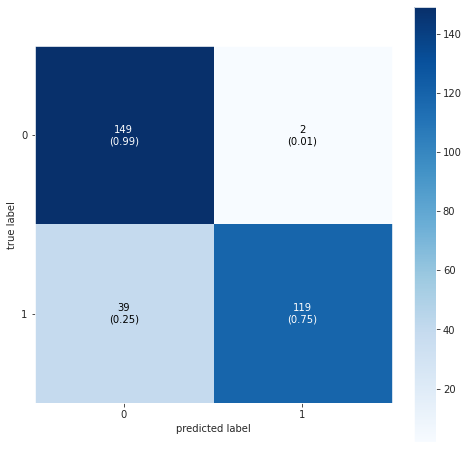

In [ ]:
actual = test_generator.classes
predict = np.argmax(model.predict(test_generator),axis =1)
cm=confusion_matrix(actual,predict)
plot_confusion_matrix(cm,figsize=(8,8),
                    colorbar=True,show_normed=True,)